# Plot models

In [30]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import glob
import os
os.chdir("/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/bin")

import json
import torch
import pandas as pd
from lib.plot import Visualizations
from lib import utils
from torch.utils.data import DataLoader
from flower.get_dataset import get_dataset, basic_collate_fn
from flower.task import Net
import matplotlib.pyplot as plt
from torch.distributions.normal import Normal
from lib.latent_ode import LatentODE
from lib.plot import plot_trajectories
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from plot_utils import plot_n_outputs


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load global model and data

In [31]:
#############################
# Load Model and Weigths
#############################

weights_file = "../results_centralized_hyperparam/periodic/centralized_training/300_epochs/lr_0.01-batchsize_16_clipping_False_lrdecay_1.0/model.pth"
#weights_file = "/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/results_federated_learningtest/periodic/federated_training/FedAvg/100_rounds/rep_1-alpha_0.5-lr_0.01-batchsize_16_clipping_False_lrdecay_1.0_localepochs_10/federated_outputs/model.pth"
weights_file = "../results_federated_learningtest/periodic/federated_training/FedAvg/100_rounds/rep_1-alpha_0.5-lr_0.001-batchsize_32_clipping_False_lrdecay_1.0_localepochs_3/federated_outputs/model.pth"
weights = torch.load(weights_file, weights_only=True)
model = Net()
model.load_state_dict(weights)

#############################
# Load Dataset
#############################
test_dataset_filename = "../data/periodic/periodic_test.pt"
time_steps_filename = "../data/periodic/periodic_time_steps.pt"
timestamps = torch.load(time_steps_filename, weights_only=True)
dataset = torch.load(test_dataset_filename, weights_only=True)


In [32]:
print(model)

LatentODE(
  (encoder_z0): Encoder_z0_ODE_RNN(
    (GRU_update): GRU_unit(
      (update_gate): Sequential(
        (0): Linear(in_features=42, out_features=100, bias=True)
        (1): Tanh()
        (2): Linear(in_features=100, out_features=20, bias=True)
        (3): Sigmoid()
      )
      (reset_gate): Sequential(
        (0): Linear(in_features=42, out_features=100, bias=True)
        (1): Tanh()
        (2): Linear(in_features=100, out_features=20, bias=True)
        (3): Sigmoid()
      )
      (new_state_net): Sequential(
        (0): Linear(in_features=42, out_features=100, bias=True)
        (1): Tanh()
        (2): Linear(in_features=100, out_features=40, bias=True)
      )
    )
    (z0_diffeq_solver): DiffeqSolver(
      (ode_func): ODEFunc(
        (gradient_net): Sequential(
          (0): Linear(in_features=20, out_features=100, bias=True)
          (1): Tanh()
          (2): Linear(in_features=100, out_features=100, bias=True)
          (3): Tanh()
          (4): Line

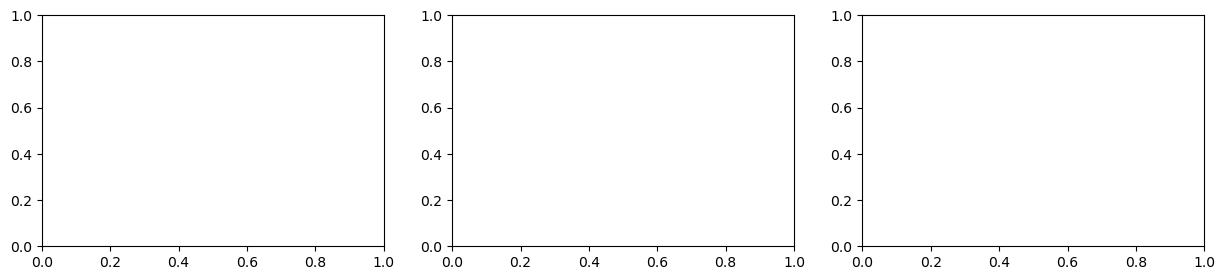

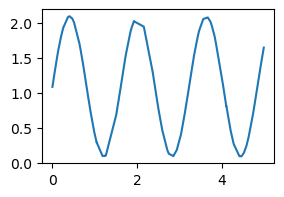

In [33]:
#############################
# Plot one example
#############################
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(3, 2)
x = timestamps.squeeze()
y = dataset[0].squeeze()
plt.plot(x, y)
plt.show()


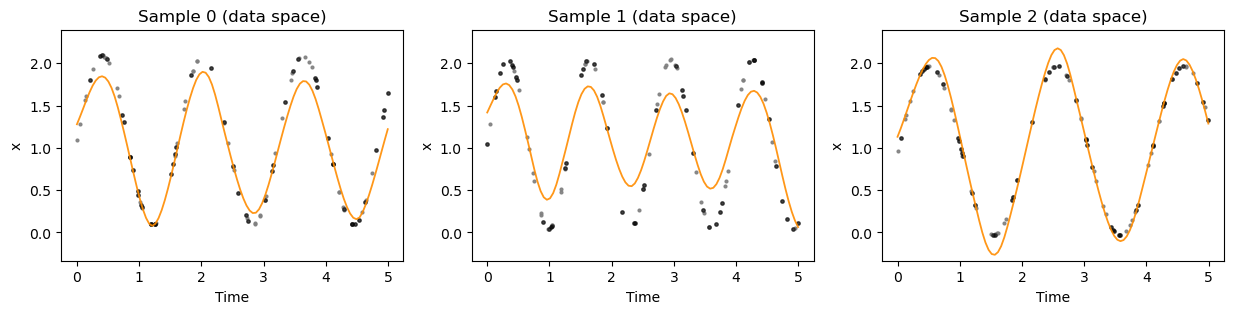

In [34]:
plot_n_outputs(model, dataset, timestamps)

In [ ]:
# viz = Visualizations(device)
# with torch.no_grad():
# 	viz.draw_all_plots_one_dim( test_dict,
# 								model,
# 								plot_name = "Test2.png",
# 								experimentID = 15,
# 								save=True)

NameError: name 'time_steps' is not defined